In [29]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from torchtext.legacy import data, datasets

import re
from wordcloud import WordCloud

In [4]:
SEED = 64

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [5]:
TEXT = data.Field(tokenize = 'spacy',
                  tokenizer_language = 'en_core_web_sm')
LABEL = data.LabelField(dtype = torch.float)

In [6]:
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

In [7]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 25000
Number of testing examples: 25000


In [10]:
num_words_dict = {'pos': [], 'neg': []}
for idx, example in tqdm(enumerate(train_data.examples)):
    example = vars(example)
    label = example['label']
    text = example['text']
    num_words_dict[label].append(len(text))

0it [00:00, ?it/s]

In [57]:
np.min(num_words_dict['pos'])

14

In [58]:
np.max(num_words_dict['pos'])

2789

In [59]:
np.mean(num_words_dict['pos'])

274.9852

In [60]:
np.median(num_words_dict['pos'])

202.0

In [61]:
np.min(num_words_dict['neg'])

11

In [62]:
np.max(num_words_dict['neg'])

1827

In [63]:
np.median(num_words_dict['neg'])

203.0

In [64]:
np.mean(num_words_dict['neg'])

269.87208

In [54]:
num_words_test_dict = {'pos': [], 'neg': []}
for idx, example in tqdm(enumerate(test_data.examples)):
    example = vars(example)
    label = example['label']
    text = example['text']
    num_words_test_dict[label].append(len(text))

0it [00:00, ?it/s]

In [65]:
np.min(num_words_test_dict['pos'])

11

In [66]:
np.median(num_words_test_dict['pos'])

198.0

In [67]:
np.max(num_words_test_dict['pos'])

2640

In [68]:
np.min(num_words_test_dict['neg'])

5

In [69]:
np.median(num_words_test_dict['neg'])

203.0

In [70]:
np.max(num_words_test_dict['neg'])

1290

In [55]:
print(len(num_words_dict['pos']), len(num_words_dict['neg']))

12500 12500


In [56]:
print(len(num_words_test_dict['pos']), len(num_words_test_dict['neg']))

12500 12500


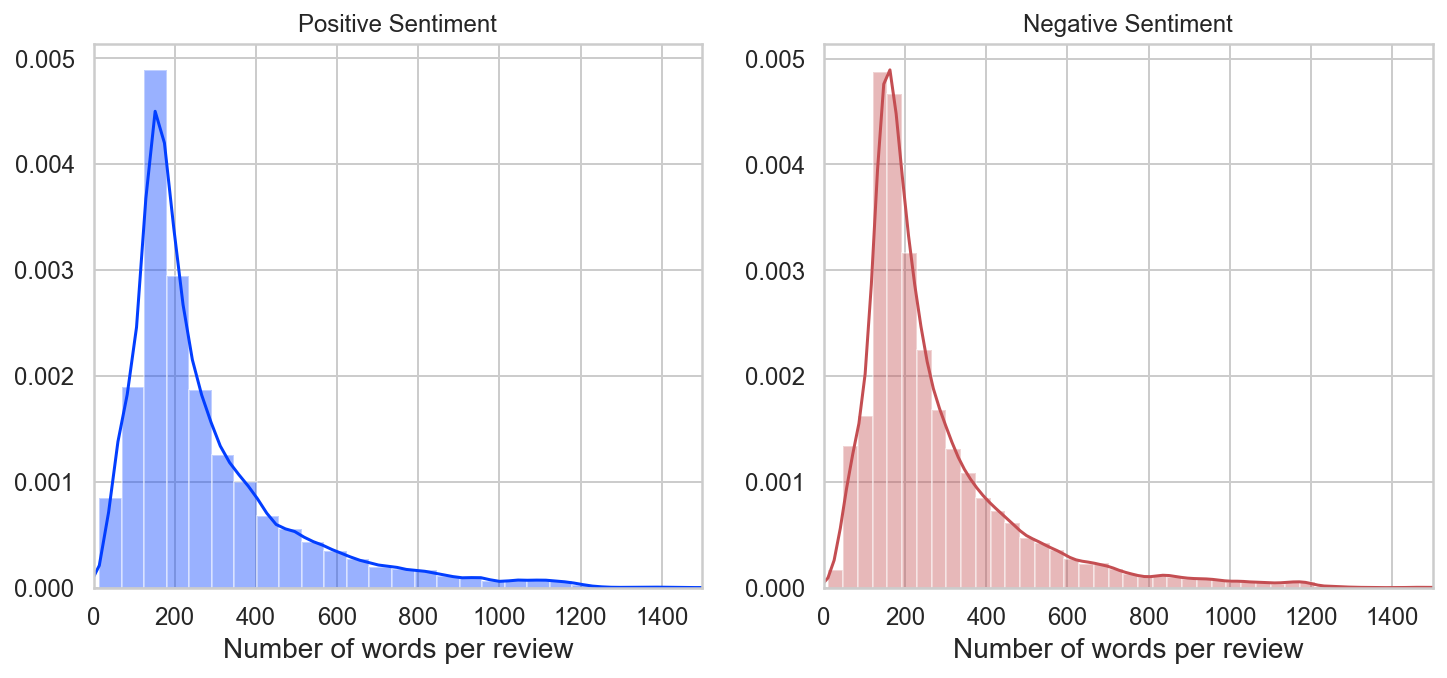

In [50]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(num_words_dict['pos'], ax=ax[0])
sns.distplot(num_words_dict['neg'], color='r', ax=ax[1])
ax[0].set_xlim([0, 1500])
ax[1].set_xlim([0, 1500])
ax[0].set_xlabel('Number of words per review')
ax[1].set_xlabel('Number of words per review')
ax[0].set_title('Positive Sentiment')
ax[1].set_title('Negative Sentiment');
f.savefig("images/chapter_07_words_per_review_dist.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_words_per_review_dist.pdf", format="pdf", dpi=300, bbox_inches="tight")

In [24]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english")) 

[nltk_data] Downloading package stopwords to /Users/ajay/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
reviews_dict = {'pos': [], 'neg': []}
for idx, example in tqdm(enumerate(train_data.examples)):
    example = vars(example)
    label = example['label']
    text = example['text']
    cleaned_text = ' '.join([word.lower() for word in text if word.lower() not in set(stop_words) and len(word) > 2])
    TAG_RE = re.compile(r'<[^>]+>')
    cleaned_text = TAG_RE.sub('', cleaned_text)
#     cleaned_text = re.sub("[^a-zA-Z]", " ", cleaned_text)
    cleaned_text = re.sub(" +", " ", cleaned_text)
    reviews_dict[label].append(cleaned_text)

0it [00:00, ?it/s]

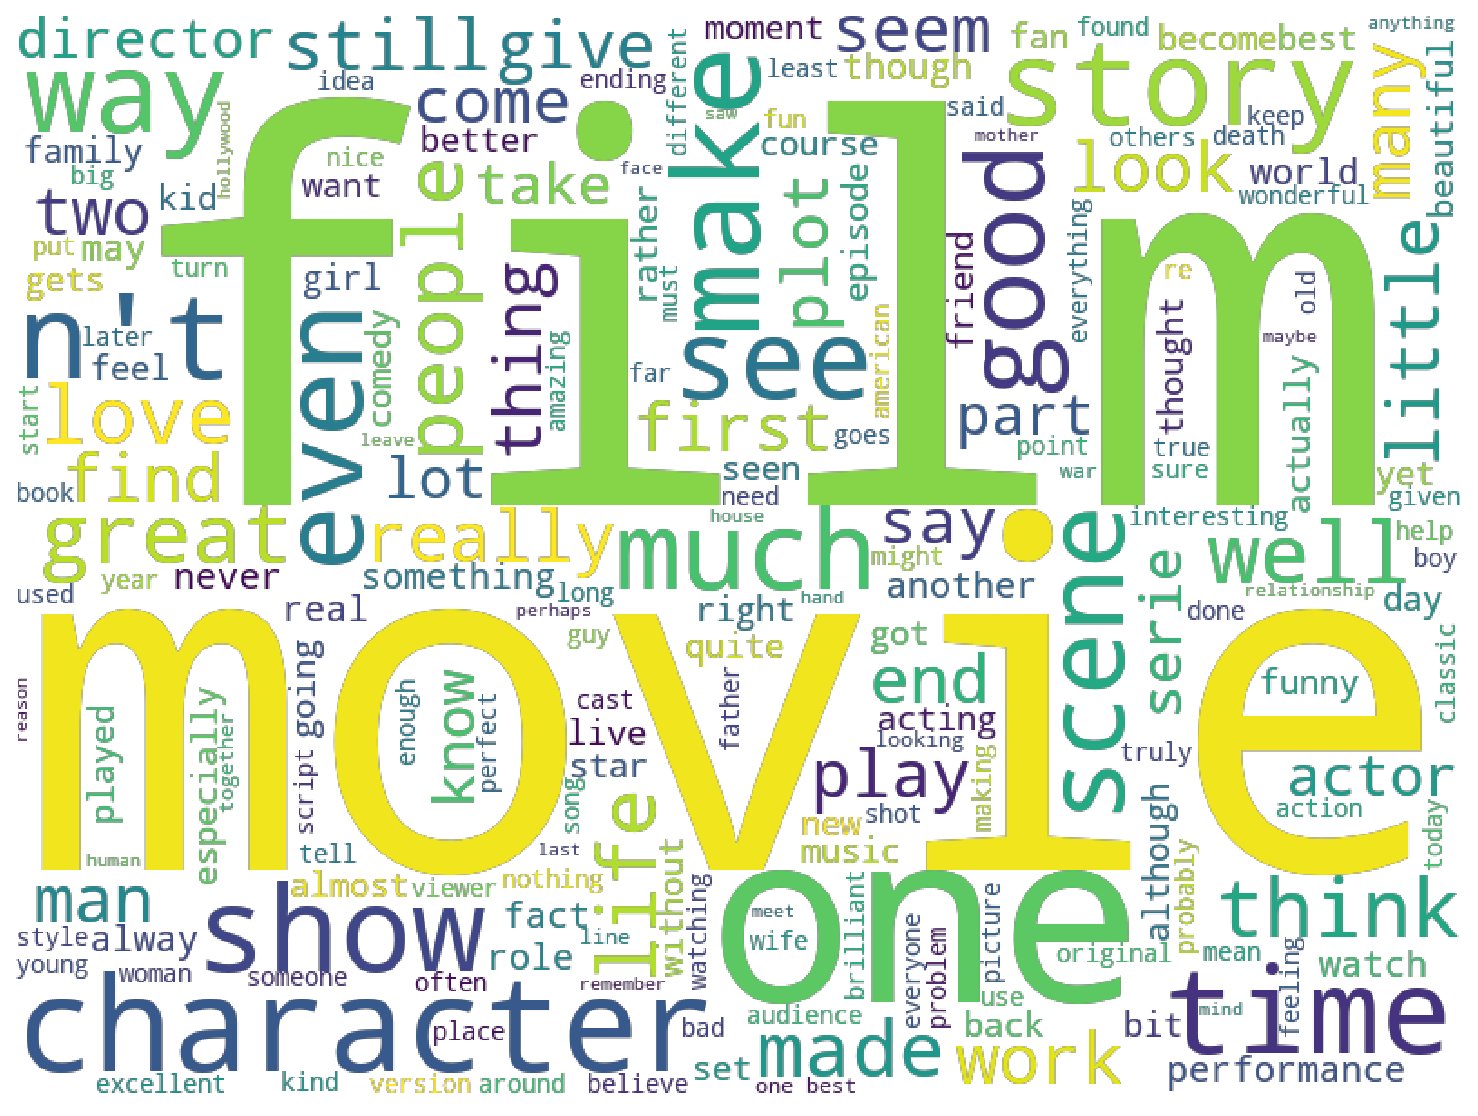

In [52]:
cloud=WordCloud(width=800, 
                height=600, 
                mode='RGBA',
                background_color=None).generate(" ".join(reviews_dict['pos'])) 
f = plt.figure(figsize=(16, 10))
plt.imshow(cloud)
plt.axis('off')
f.savefig("images/chapter_07_positive_word_cloud.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_positive_word_cloud.pdf", format="pdf", dpi=300, bbox_inches="tight");

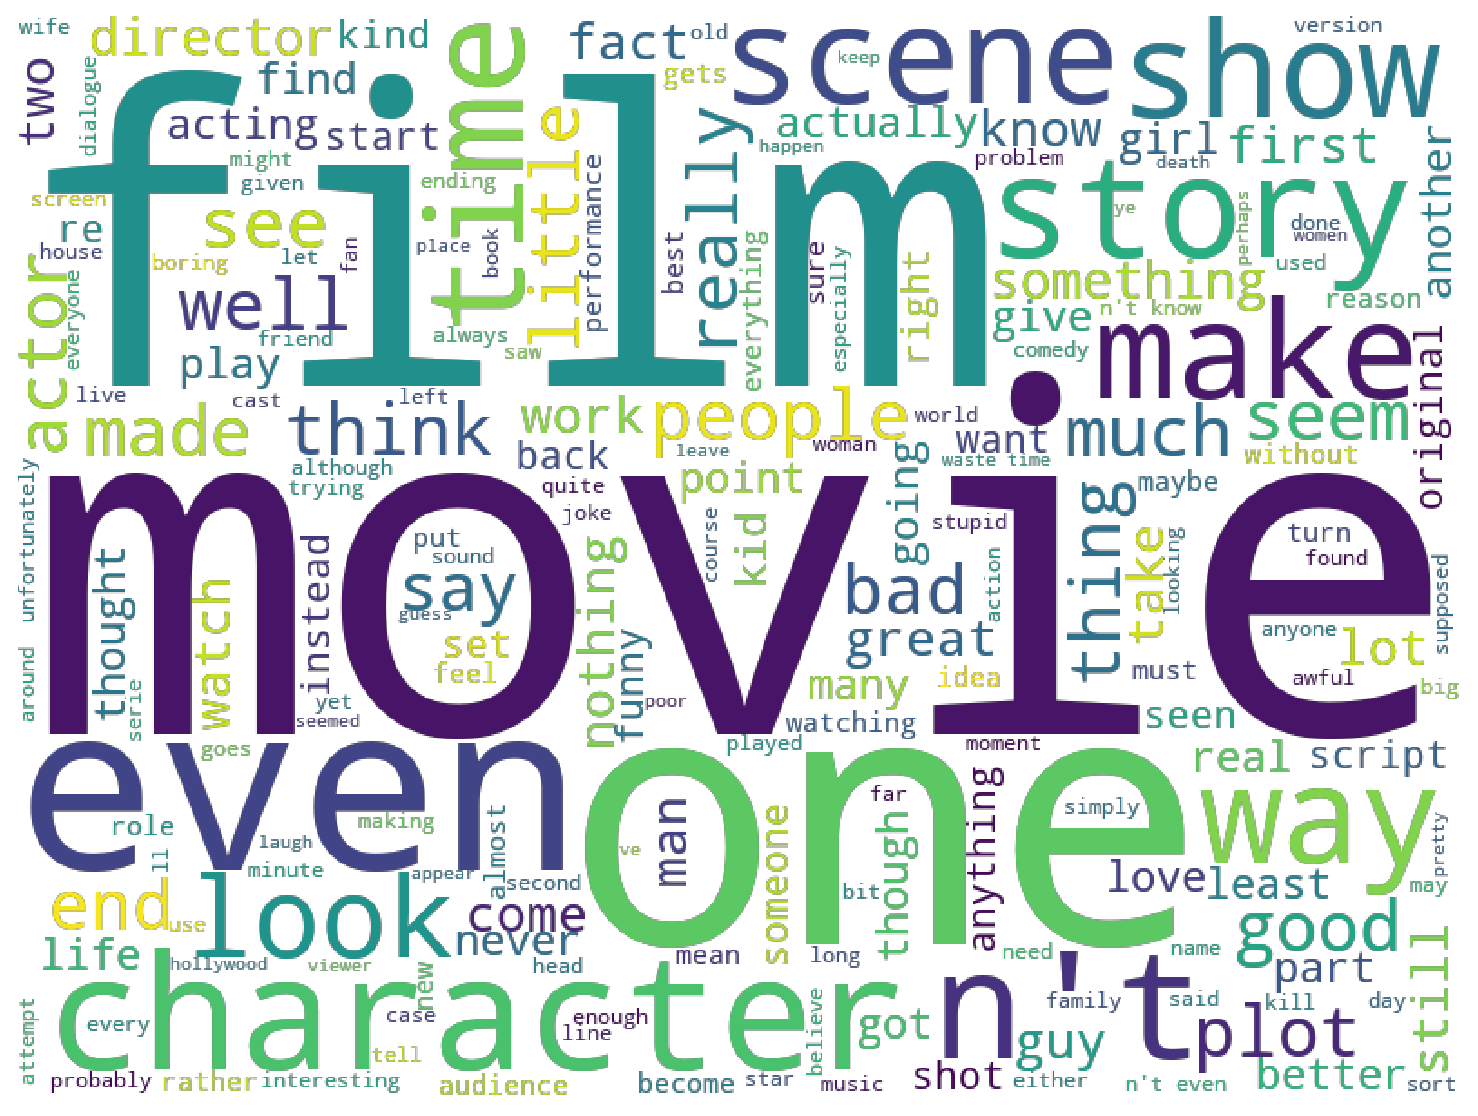

In [53]:
cloud=WordCloud(width=800, 
                height=600, 
                mode='RGBA',
                background_color=None).generate(" ".join(reviews_dict['neg'])) 
f = plt.figure(figsize=(16,10))
plt.imshow(cloud)
plt.axis('off')
f.savefig("images/chapter_07_negative_word_cloud.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_negative_word_cloud.pdf", format="pdf", dpi=300, bbox_inches="tight");

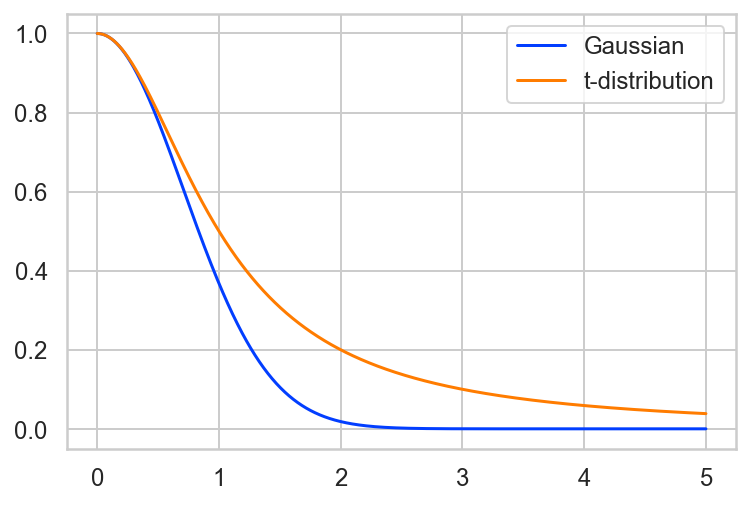

In [71]:
z = np.linspace(0., 5., 1000)
gauss = np.exp(-z**2)
cauchy = 1/(1+z**2)

f, ax = plt.subplots()
ax.plot(z, gauss, label='Gaussian')
ax.plot(z, cauchy, label='t-distribution')
ax.legend()
f.savefig("images/chapter_07_gaussian_vs_t.png", dpi=300, bbox_inches="tight")
f.savefig("images/chapter_07_gaussian_vs_t.pdf", format="pdf", dpi=300, bbox_inches="tight");